In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [2]:
AAPL = pd.read_csv("Database/Pre_Processed_AAPL.csv")
TSLA = pd.read_csv("Database/Pre_Processed_TSLA.csv")
GOOG = pd.read_csv("Database/Pre_Processed_GOOG.csv")
MSFT = pd.read_csv("Database/Pre_Processed_MSFT.csv")
AMZN = pd.read_csv("Database/Pre_Processed_AMZN.csv")

# Apple

In [3]:
# Convert Date column to datetime
AAPL['Date'] = pd.to_datetime(AAPL['Date'])

In [4]:
# Extract the 'Adj. Close' column
data = AAPL['Adj. Close'].values.reshape(-1, 1)

In [5]:
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

In [6]:
# Define a function to prepare the data for LSTM
def prepare_data(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:(i + time_steps), 0])
        y.append(data[i + time_steps, 0])
    return np.array(X), np.array(y)

In [7]:
# Define the number of time steps for LSTM
time_steps = 30

In [8]:
# Prepare the data
X, y = prepare_data(data_scaled, time_steps)

In [9]:
# Reshape the input data for LSTM [samples, time steps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)

In [10]:
# Split the data into training and testing sets
split = int(0.8 * len(X))
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

In [11]:
# Define the LSTM model
model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),
    LSTM(units=50, return_sequences=True),
    Dropout(0.2),
    LSTM(units=50),
    Dropout(0.2),
    Dense(units=1)
])

In [12]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [13]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1, verbose=1)

Epoch 1/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0046 - val_loss: 2.3775e-04
Epoch 2/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 3.9137e-04 - val_loss: 5.3095e-04
Epoch 3/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 3.3151e-04 - val_loss: 7.8316e-04
Epoch 4/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 3.5378e-04 - val_loss: 2.4419e-04
Epoch 5/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 3.9221e-04 - val_loss: 6.1750e-04
Epoch 6/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 3.5236e-04 - val_loss: 3.9838e-04
Epoch 7/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 3.0904e-04 - val_loss: 3.2998e-04
Epoch 8/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 2.7033e-04 - val_loss: 2.1217e-04
Epoch 9/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 2.7402e-04 - val_loss: 2.2276e-04
Epoch 10/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 2.4681e-04 - val_loss: 4.6780e-04
Epoch 11/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 2.

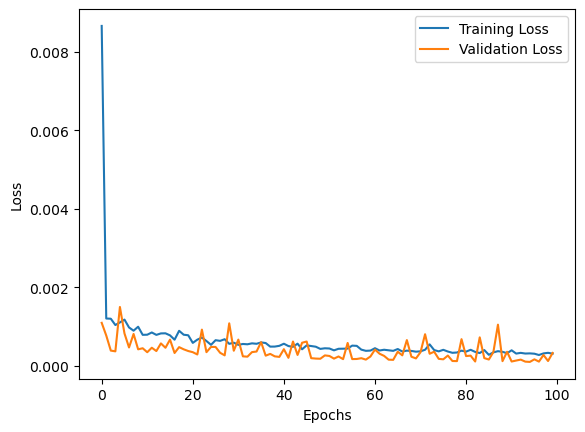

In [85]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [15]:
# Make predictions
y_pred = model.predict(X_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step


In [16]:
# Inverse transform predictions and actual values
y_pred_inv = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

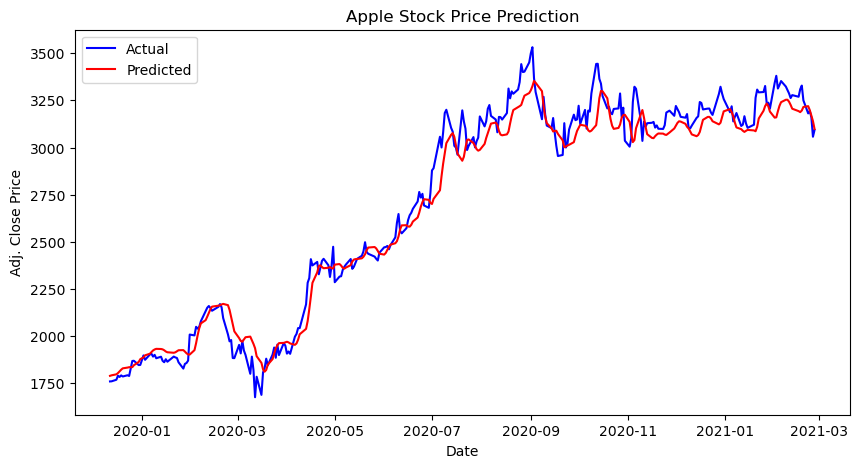

In [86]:
# Plotting the predictions for Apple dataset
plt.figure(figsize=(10, 5))
plt.plot(AAPL['Date'].iloc[-len(y_test):], y_test_inv, label='Actual', color='blue')
plt.plot(AAPL['Date'].iloc[-len(y_test):], y_pred_inv, label='Predicted', color='red')
plt.xlabel('Date')
plt.ylabel('Adj. Close Price')
plt.title('Apple Stock Price Prediction')
plt.legend()
plt.show()

In [17]:
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 8.700268343972638


# Tesla

In [18]:
# Convert Date column to datetime
TSLA['Date'] = pd.to_datetime(TSLA['Date'])

In [19]:
# Extract the 'Adj. Close' column
data = TSLA['Adj. Close'].values.reshape(-1, 1)

In [20]:
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

In [21]:
# Define a function to prepare the data for LSTM
def prepare_data(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:(i + time_steps), 0])
        y.append(data[i + time_steps, 0])
    return np.array(X), np.array(y)

In [22]:
# Define the number of time steps for LSTM
time_steps = 30

In [23]:
# Prepare the data
X, y = prepare_data(data_scaled, time_steps)

In [24]:
# Reshape the input data for LSTM [samples, time steps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)

In [25]:
# Split the data into training and testing sets
split = int(0.8 * len(X))
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

In [26]:
# Define the LSTM model
model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),
    LSTM(units=50, return_sequences=True),
    Dropout(0.2),
    LSTM(units=50),
    Dropout(0.2),
    Dense(units=1)
])

In [27]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [28]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1, verbose=1)

Epoch 1/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 2.5984e-04 - val_loss: 3.8735e-05
Epoch 2/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 3.8596e-05 - val_loss: 2.6968e-05
Epoch 3/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 3.1938e-05 - val_loss: 2.2976e-05
Epoch 4/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 3.2737e-05 - val_loss: 3.3992e-05
Epoch 5/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 3.5879e-05 - val_loss: 3.9992e-05
Epoch 6/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 3.6577e-05 - val_loss: 2.4672e-05
Epoch 7/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 2.4562e-05 - val_loss: 1.9209e-05
Epoch 8/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 2.3396e-05 - val_loss: 2.8260e-05
Epoch 9/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 2.2314e-05 - val_loss: 1.7280e-05
Epoch 10/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 2.3892e-05 - val_loss: 2.0298e-05
Epoch 11/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss

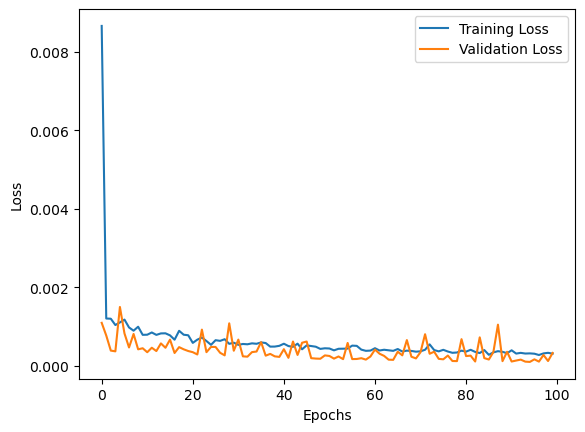

In [83]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [30]:
# Make predictions
y_pred = model.predict(X_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step


In [31]:
# Inverse transform predictions and actual values
y_pred_inv = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

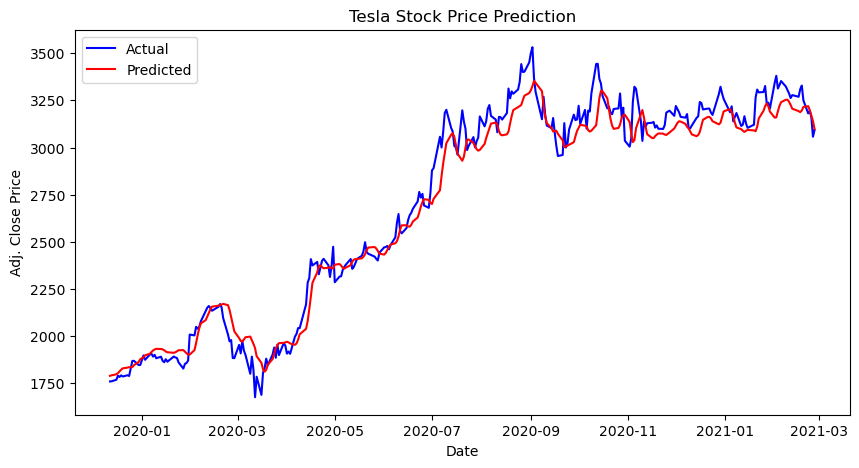

In [87]:
# Plotting the predictions for Tesla dataset
plt.figure(figsize=(10, 5))
plt.plot(TSLA['Date'].iloc[-len(y_test):], y_test_inv, label='Actual', color='blue')
plt.plot(TSLA['Date'].iloc[-len(y_test):], y_pred_inv, label='Predicted', color='red')
plt.xlabel('Date')
plt.ylabel('Adj. Close Price')
plt.title('Tesla Stock Price Prediction')
plt.legend()
plt.show()

In [32]:
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 32.18709424823176


# Google

In [33]:
# Convert Date column to datetime
GOOG['Date'] = pd.to_datetime(GOOG['Date'])

In [34]:
# Extract the 'Adj. Close' column
data = GOOG['Adj. Close'].values.reshape(-1, 1)

In [35]:
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

In [36]:
# Define a function to prepare the data for LSTM
def prepare_data(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:(i + time_steps), 0])
        y.append(data[i + time_steps, 0])
    return np.array(X), np.array(y)

In [37]:
# Define the number of time steps for LSTM
time_steps = 30

In [38]:
# Prepare the data
X, y = prepare_data(data_scaled, time_steps)

In [39]:
# Reshape the input data for LSTM [samples, time steps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)

In [40]:
# Split the data into training and testing sets
split = int(0.8 * len(X))
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

In [41]:
# Define the LSTM model
model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),
    LSTM(units=50, return_sequences=True),
    Dropout(0.2),
    LSTM(units=50),
    Dropout(0.2),
    Dense(units=1)
])

In [42]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [43]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1, verbose=1)

Epoch 1/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0186 - val_loss: 0.0016
Epoch 2/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0015 - val_loss: 0.0013
Epoch 3/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0012 - val_loss: 0.0027
Epoch 4/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0012 - val_loss: 0.0016
Epoch 5/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0011 - val_loss: 0.0016
Epoch 6/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0012 - val_loss: 4.6216e-04
Epoch 7/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 9.4890e-04 - val_loss: 0.0011
Epoch 8/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 8.7754e-04 - val_loss: 0.0013
Epoch 9/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0011 - val_loss: 3.5626e-04
Epoch 10/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 9.0870e-04 - val_loss: 0.0015
Epoch 11/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 8.7014e-04 - val_loss: 2.6625e-04
Epoch 12/100
35/35 ━━━━━

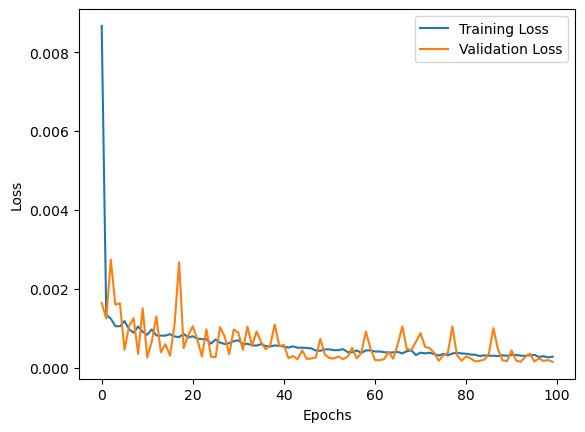

In [44]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [45]:
# Make predictions
y_pred = model.predict(X_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step


In [46]:
# Inverse transform predictions and actual values
y_pred_inv = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

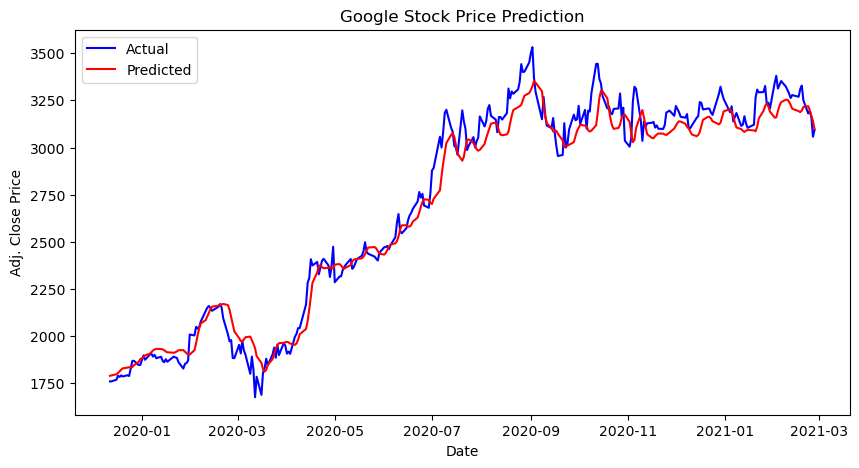

In [88]:
# Plotting the predictions for Google dataset
plt.figure(figsize=(10, 5))
plt.plot(GOOG['Date'].iloc[-len(y_test):], y_test_inv, label='Actual', color='blue')
plt.plot(GOOG['Date'].iloc[-len(y_test):], y_pred_inv, label='Predicted', color='red')
plt.xlabel('Date')
plt.ylabel('Adj. Close Price')
plt.title('Google Stock Price Prediction')
plt.legend()
plt.show()

In [47]:
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 45.52779542885159


# Microsoft

In [48]:
# Convert Date column to datetime
MSFT['Date'] = pd.to_datetime(MSFT['Date'])

In [49]:
# Extract the 'Adj. Close' column
data = MSFT['Adj. Close'].values.reshape(-1, 1)

In [50]:
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

In [51]:
# Define a function to prepare the data for LSTM
def prepare_data(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:(i + time_steps), 0])
        y.append(data[i + time_steps, 0])
    return np.array(X), np.array(y)

In [52]:
# Define the number of time steps for LSTM
time_steps = 30

In [53]:
# Prepare the data
X, y = prepare_data(data_scaled, time_steps)

In [54]:
# Reshape the input data for LSTM [samples, time steps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)

In [55]:
# Split the data into training and testing sets
split = int(0.8 * len(X))
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

In [56]:
# Define the LSTM model
model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),
    LSTM(units=50, return_sequences=True),
    Dropout(0.2),
    LSTM(units=50),
    Dropout(0.2),
    Dense(units=1)
])

In [57]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [58]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1, verbose=1)

Epoch 1/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0149 - val_loss: 2.6445e-04
Epoch 2/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 9.0466e-04 - val_loss: 2.3786e-04
Epoch 3/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 6.0681e-04 - val_loss: 0.0018
Epoch 4/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 6.5091e-04 - val_loss: 1.8296e-04
Epoch 5/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 5.6540e-04 - val_loss: 2.8309e-04
Epoch 6/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 5.4890e-04 - val_loss: 9.0658e-04
Epoch 7/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 5.6410e-04 - val_loss: 3.4792e-04
Epoch 8/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 4.3846e-04 - val_loss: 2.6083e-04
Epoch 9/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 3.9375e-04 - val_loss: 5.7183e-04
Epoch 10/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 4.6655e-04 - val_loss: 7.8671e-04
Epoch 11/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 4.5539

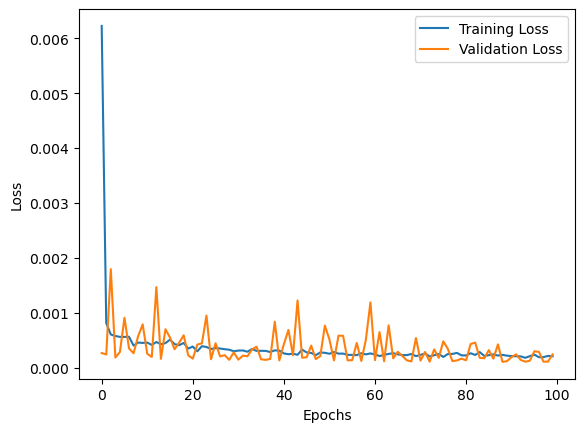

In [59]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [60]:
# Make predictions
y_pred = model.predict(X_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step


In [61]:
# Inverse transform predictions and actual values
y_pred_inv = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

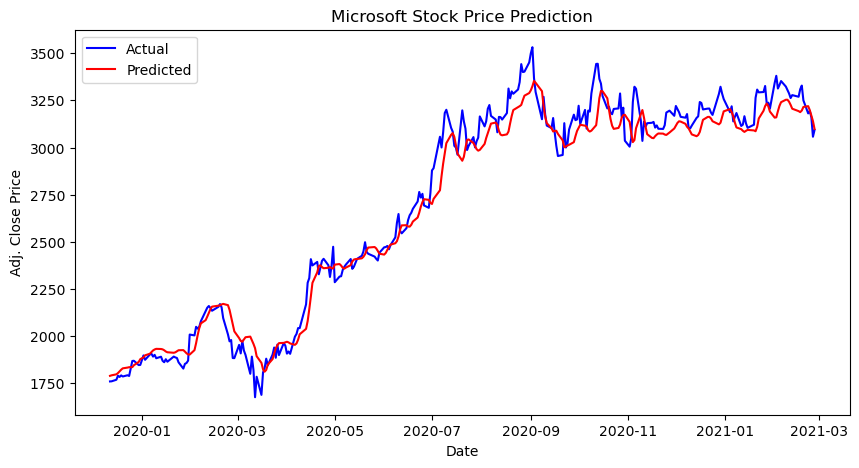

In [89]:
# Plotting the predictions for Microsoft dataset
plt.figure(figsize=(10, 5))
plt.plot(MSFT['Date'].iloc[-len(y_test):], y_test_inv, label='Actual', color='blue')
plt.plot(MSFT['Date'].iloc[-len(y_test):], y_pred_inv, label='Predicted', color='red')
plt.xlabel('Date')
plt.ylabel('Adj. Close Price')
plt.title('Microsoft Stock Price Prediction')
plt.legend()
plt.show()

In [62]:
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 6.602892829779307


# Amazon

In [63]:
# Convert Date column to datetime
AMZN['Date'] = pd.to_datetime(AMZN['Date'])

In [64]:
# Extract the 'Adj. Close' column
data = AMZN['Adj. Close'].values.reshape(-1, 1)

In [65]:
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

In [66]:
# Define a function to prepare the data for LSTM
def prepare_data(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:(i + time_steps), 0])
        y.append(data[i + time_steps, 0])
    return np.array(X), np.array(y)

In [67]:
# Define the number of time steps for LSTM
time_steps = 30

In [68]:
# Prepare the data
X, y = prepare_data(data_scaled, time_steps)

In [69]:
# Reshape the input data for LSTM [samples, time steps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)

In [70]:
# Split the data into training and testing sets
split = int(0.8 * len(X))
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

In [71]:
# Define the LSTM model
model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),
    LSTM(units=50, return_sequences=True),
    Dropout(0.2),
    LSTM(units=50),
    Dropout(0.2),
    Dense(units=1)
])

In [72]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [73]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1, verbose=1)

Epoch 1/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0176 - val_loss: 0.0011
Epoch 2/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0013 - val_loss: 7.7207e-04
Epoch 3/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0012 - val_loss: 3.8827e-04
Epoch 4/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 9.7448e-04 - val_loss: 3.6920e-04
Epoch 5/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0011 - val_loss: 0.0015
Epoch 6/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0012 - val_loss: 8.2612e-04
Epoch 7/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0010 - val_loss: 4.6830e-04
Epoch 8/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 7.7100e-04 - val_loss: 8.1206e-04
Epoch 9/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0010 - val_loss: 4.2103e-04
Epoch 10/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 7.4640e-04 - val_loss: 4.4794e-04
Epoch 11/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 7.8775e-04 - val_loss: 3.4709e-04


Epoch 65/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 3.5503e-04 - val_loss: 1.5241e-04
Epoch 66/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 4.0221e-04 - val_loss: 3.5890e-04
Epoch 67/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 3.2843e-04 - val_loss: 2.6769e-04
Epoch 68/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 3.7662e-04 - val_loss: 6.5618e-04
Epoch 69/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 3.9541e-04 - val_loss: 2.3226e-04
Epoch 70/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 3.7313e-04 - val_loss: 1.8912e-04
Epoch 71/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 3.8378e-04 - val_loss: 3.4803e-04
Epoch 72/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 4.0885e-04 - val_loss: 8.0572e-04
Epoch 73/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 6.0558e-04 - val_loss: 3.0794e-04
Epoch 74/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 3.9591e-04 - val_loss: 3.5970e-04
Epoch 75/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/st

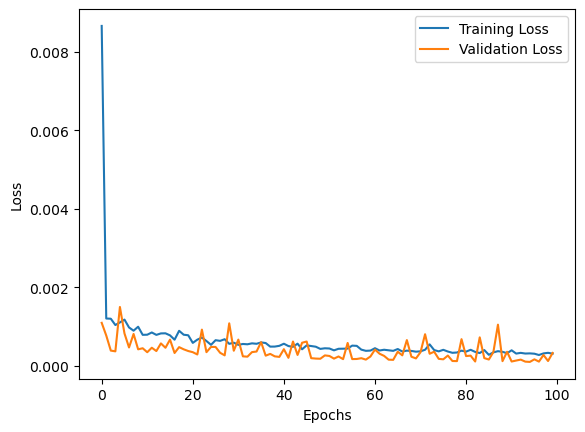

In [79]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [75]:
# Make predictions
y_pred = model.predict(X_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step


In [76]:
# Inverse transform predictions and actual values
y_pred_inv = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

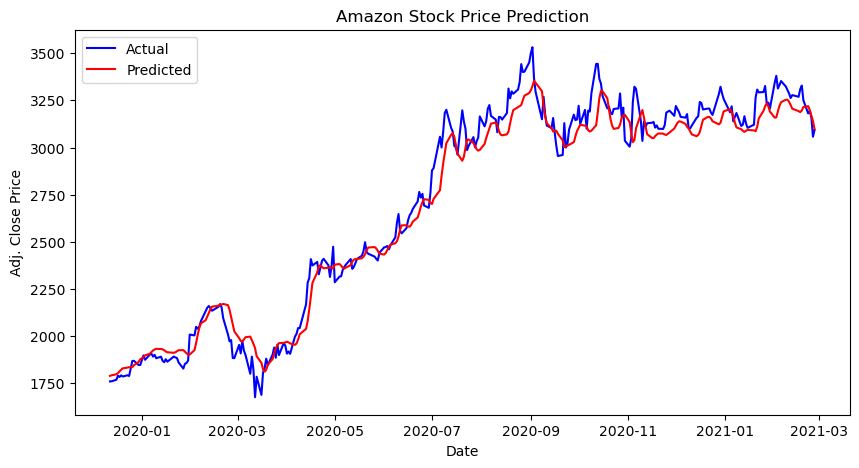

In [91]:
# Plotting the predictions for Amazon dataset
plt.figure(figsize=(10, 5))
plt.plot(AMZN['Date'].iloc[-len(y_test):], y_test_inv, label='Actual', color='blue')
plt.plot(AMZN['Date'].iloc[-len(y_test):], y_pred_inv, label='Predicted', color='red')
plt.xlabel('Date')
plt.ylabel('Adj. Close Price')
plt.title('Amazon Stock Price Prediction')
plt.legend()
plt.show()

In [77]:
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 95.17480869340741
